In [15]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
img = cv2.imread('./test_images/cristiano2.jpg')
img.shape

(345, 615, 3)

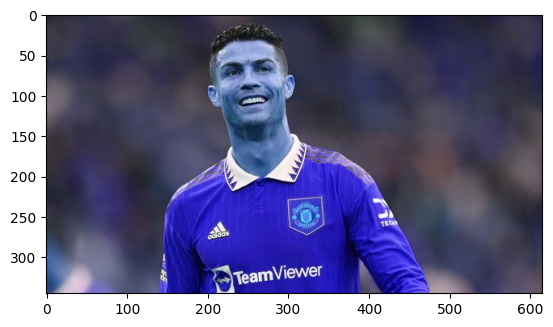

In [17]:
plt.imshow(img)

In [18]:
gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(345, 615)

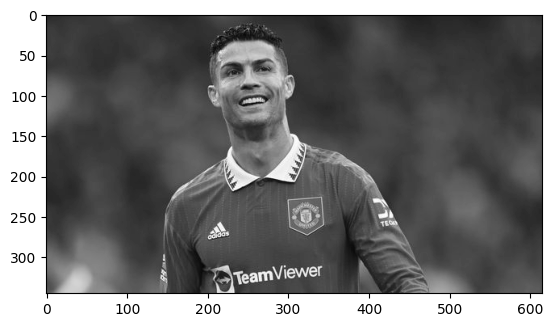

In [19]:
plt.imshow(gray, cmap='gray')

El face cascade ia3tina el x,y wel width wel height

In [20]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[198,  26, 107, 107]])

In [21]:
(x,y,w,h) = faces[0]
x,y,w,h

(198, 26, 107, 107)

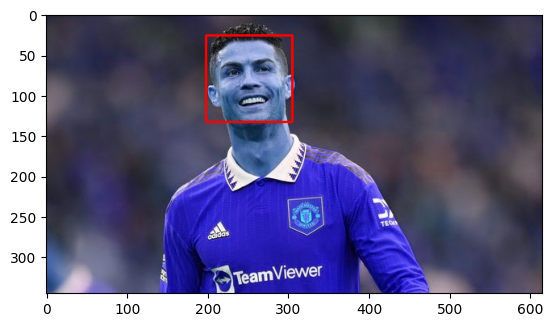

In [22]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

Roi (Region Of Interest)

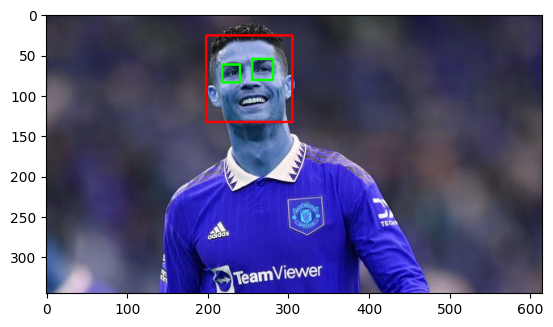

In [23]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

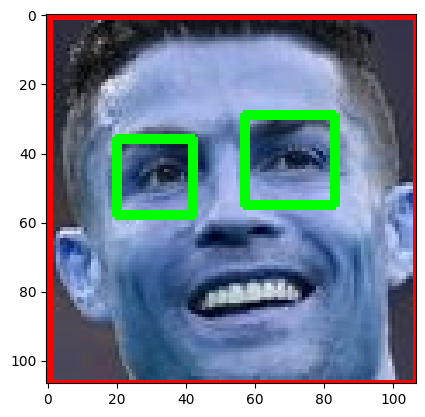

In [24]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    

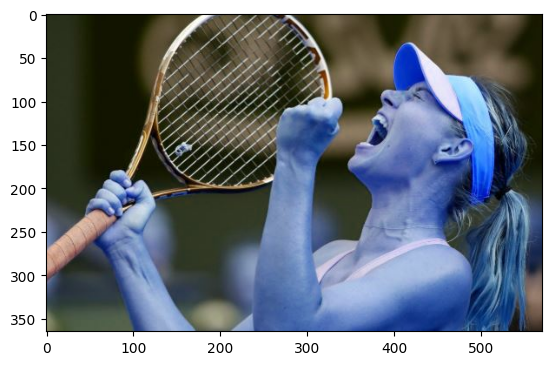

In [26]:
original_image = cv2.imread('./test_images/sharapova2.JPG')
plt.imshow(original_image)

In [27]:
get_cropped_image_if_2_eyes('./test_images/sharapova2.JPG')

In [28]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [29]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['./dataset/benzema',
 './dataset/cristiano_ronaldo',
 './dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams']

In [31]:
img_dirs = [dir for dir in img_dirs if dir != './dataset/cropped']
img_dirs

['./dataset/benzema',
 './dataset/cristiano_ronaldo',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams']

recreate the Cropped folder

In [32]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

Main Cropping algorithm (put Cropped images in Cropped folder)

In [33]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
        else:
            continue    

Generating cropped images in folder:  ./dataset/cropped/benzema
Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams


In [34]:
celebrity_file_names_dict

{'benzema': ['./dataset/cropped/benzema/benzema1.png',
  './dataset/cropped/benzema/benzema2.png',
  './dataset/cropped/benzema/benzema3.png',
  './dataset/cropped/benzema/benzema4.png',
  './dataset/cropped/benzema/benzema5.png',
  './dataset/cropped/benzema/benzema6.png',
  './dataset/cropped/benzema/benzema7.png',
  './dataset/cropped/benzema/benzema8.png',
  './dataset/cropped/benzema/benzema9.png',
  './dataset/cropped/benzema/benzema10.png',
  './dataset/cropped/benzema/benzema11.png',
  './dataset/cropped/benzema/benzema12.png',
  './dataset/cropped/benzema/benzema13.png',
  './dataset/cropped/benzema/benzema14.png',
  './dataset/cropped/benzema/benzema15.png',
  './dataset/cropped/benzema/benzema16.png',
  './dataset/cropped/benzema/benzema17.png',
  './dataset/cropped/benzema/benzema18.png',
  './dataset/cropped/benzema/benzema19.png',
  './dataset/cropped/benzema/benzema20.png',
  './dataset/cropped/benzema/benzema21.png',
  './dataset/cropped/benzema/benzema22.png',
  './dat

In [35]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

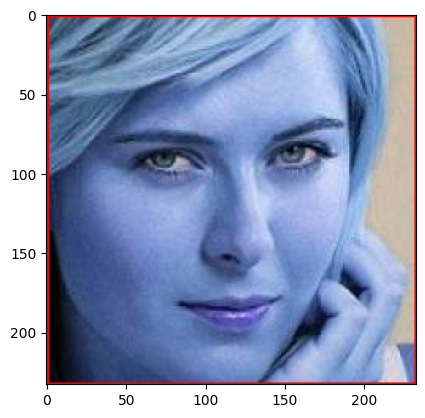

In [36]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

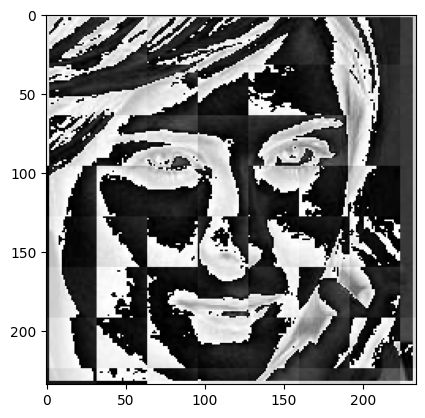

In [37]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

rebuild our dictionnary

In [38]:
cropped_image_dirs

['./dataset/cropped/benzema',
 './dataset/cropped/cristiano_ronaldo',
 './dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federer',
 './dataset/cropped/serena_williams']

In [39]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list   
celebrity_file_names_dict

{'benzema': ['./dataset/cropped/benzema\\benzema1.png',
  './dataset/cropped/benzema\\benzema10.png',
  './dataset/cropped/benzema\\benzema11.png',
  './dataset/cropped/benzema\\benzema12.png',
  './dataset/cropped/benzema\\benzema13.png',
  './dataset/cropped/benzema\\benzema14.png',
  './dataset/cropped/benzema\\benzema15.png',
  './dataset/cropped/benzema\\benzema16.png',
  './dataset/cropped/benzema\\benzema17.png',
  './dataset/cropped/benzema\\benzema18.png',
  './dataset/cropped/benzema\\benzema19.png',
  './dataset/cropped/benzema\\benzema2.png',
  './dataset/cropped/benzema\\benzema20.png',
  './dataset/cropped/benzema\\benzema21.png',
  './dataset/cropped/benzema\\benzema22.png',
  './dataset/cropped/benzema\\benzema23.png',
  './dataset/cropped/benzema\\benzema24.png',
  './dataset/cropped/benzema\\benzema25.png',
  './dataset/cropped/benzema\\benzema26.png',
  './dataset/cropped/benzema\\benzema27.png',
  './dataset/cropped/benzema\\benzema28.png',
  './dataset/cropped/benz

Change Categorical labels to integer

In [40]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'benzema': 0,
 'cristiano_ronaldo': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'roger_federer': 4,
 'serena_williams': 5}

We will announce our X and Y now

In [41]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(238, 4096)

el pipeline te5demlek el etape mt3 el data scaling (transform) wel initialisation mta3 el model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6875

In [45]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.41      1.00      0.58         9
           2       1.00      0.70      0.82        10
           3       0.80      0.57      0.67         7
           4       1.00      0.43      0.60         7
           5       0.83      0.71      0.77         7

    accuracy                           0.69        48
   macro avg       0.84      0.67      0.70        48
weighted avg       0.84      0.69      0.71        48



In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pipe.predict(X_test))
print(cm)
accuracy_score(y_test, pipe.predict(X_test))

[[5 2 0 0 0 1]
 [0 9 0 0 0 0]
 [0 3 7 0 0 0]
 [0 3 0 4 0 0]
 [0 3 0 1 3 0]
 [0 2 0 0 0 5]]


0.6875

Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [47]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

This gives The score Of the validation Test

In [49]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.757895,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.489474,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.752632,{'logisticregression__C': 5}


In [50]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

This gives the score on the Test Set

In [51]:
best_estimators['svm'].score(X_test,y_test)

0.75

In [52]:
best_estimators['random_forest'].score(X_test,y_test)

0.5416666666666666

In [53]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8125

Save the trained Model

In [54]:
best_clf = best_estimators['svm']
#clf : classificator

In [55]:
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model3.pkl')

['saved_model3.pkl']

Save the class dictionary

In [56]:
class_dict

{'benzema': 0,
 'cristiano_ronaldo': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'roger_federer': 4,
 'serena_williams': 5}

In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))